In [54]:
import random
import math
import numpy as np
import cv2
import matplotlib.pyplot as plt
import json
import pydicom as dicom
from imgaug import augmenters as iaa
from tqdm import tqdm
import pandas as pd 
import glob
import matplotlib.patches as patches

In [100]:
df = pd.read_csv('./all/stage_1_train_labels.csv')
df.head()

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1


## Only positive (w/ Pneumonia)

In [101]:
dp = df[df['Target']==1]
dp.head()

,patientId,x,y,width,height,Target
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1
5,00436515-870c-4b36-a041-de91049b9ab4,562.0,152.0,256.0,453.0,1
8,00704310-78a8-4b38-8475-49f4573b2dbb,323.0,577.0,160.0,104.0,1
9,00704310-78a8-4b38-8475-49f4573b2dbb,695.0,575.0,162.0,137.0,1
14,00aecb01-a116-45a2-956c-08d2fa55433f,288.0,322.0,94.0,135.0,1


In [77]:
row=1
dp.iloc[row]

patientId    00436515-870c-4b36-a041-de91049b9ab4
x                                             562
y                                             152
width                                         256
height                                        453
Target                                          1
Name: 5, dtype: object

In [78]:
filenameDCM = dp.iloc[0]['patientId'] + '.dcm'
x = dp.iloc[row]['x']
y = dp.iloc[row]['y']
width = dp.iloc[row]['width']
height = dp.iloc[row]['height']
filenameDCM

'00436515-870c-4b36-a041-de91049b9ab4.dcm'

In [82]:
ds = dicom.dcmread('./all/stage_1_train_images/'+filenameDCM)
ds

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.6379.1517874325.469569
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time                          TM: '000000.00'
(0008, 0050) Accession Number                    SH: ''
(0008, 0060) Modality                            CS: 'CR'
(0008, 0064) Conversion Type                     CS: 'WSD'
(0008, 0090) Referring Physician's Name          PN: ''
(0008, 103e) Series Description                  LO: 'view: AP'
(0010, 0010) Patient's Name                      PN: '00436515-870c-4b36-a041-de91049b9ab4'
(0010, 0020) Patient ID                          LO: '00436515-870c-4b36-a041-de91049b9ab4'
(0010, 0030) Patient's Birth Date                DA: ''
(0010, 0040) Patient's Sex                       CS: 'F'
(0010, 1010) Patient's

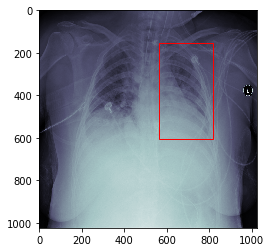

In [86]:
fig,ax = plt.subplots(1)
rect = patches.Rectangle((x,y),width,height,linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
ax.imshow(ds.pixel_array, cmap=plt.cm.bone)  #cmap=plt.gray 

In [112]:
ds.pixel_array.shape

(1024, 1024)

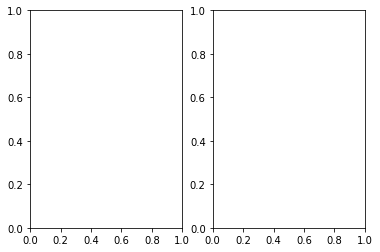

In [95]:
fig,ax = plt.subplots(1,2)

In [98]:
rect = patches.Rectangle((x,y),width,height,linewidth=1,edgecolor='r',facecolor='none')
ax[0].add_patch(rect)
ax[0].imshow(ds.pixel_array, cmap=plt.cm.bone)  #cmap=plt.gray 
rect = patches.Rectangle((x,y),width,height,linewidth=1,edgecolor='r',facecolor='none')
ax[1].add_patch(rect)
ax[1].imshow(ds.pixel_array, cmap=plt.gray())

<Figure size 432x288 with 0 Axes>

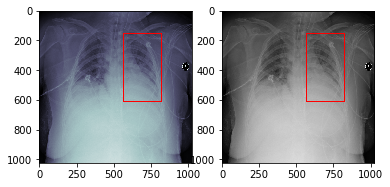

In [99]:
fig

## Only Negative (w/o Pneumonia)

In [102]:
dn = df[df['Target']==0]
dp.head()

,patientId,x,y,width,height,Target
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1
5,00436515-870c-4b36-a041-de91049b9ab4,562.0,152.0,256.0,453.0,1
8,00704310-78a8-4b38-8475-49f4573b2dbb,323.0,577.0,160.0,104.0,1
9,00704310-78a8-4b38-8475-49f4573b2dbb,695.0,575.0,162.0,137.0,1
14,00aecb01-a116-45a2-956c-08d2fa55433f,288.0,322.0,94.0,135.0,1


In [103]:
row=1
dn.iloc[row]

patientId    00313ee0-9eaa-42f4-b0ab-c148ed3241cd
x                                             NaN
y                                             NaN
width                                         NaN
height                                        NaN
Target                                          0
Name: 1, dtype: object

In [104]:
filenameDCM = dn.iloc[0]['patientId'] + '.dcm'
filenameDCM

'0004cfab-14fd-4e49-80ba-63a80b6bddd6.dcm'

In [105]:
ds = dicom.dcmread('./all/stage_1_train_images/'+filenameDCM)
ds

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.28530.1517874485.775526
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time                          TM: '000000.00'
(0008, 0050) Accession Number                    SH: ''
(0008, 0060) Modality                            CS: 'CR'
(0008, 0064) Conversion Type                     CS: 'WSD'
(0008, 0090) Referring Physician's Name          PN: ''
(0008, 103e) Series Description                  LO: 'view: PA'
(0010, 0010) Patient's Name                      PN: '0004cfab-14fd-4e49-80ba-63a80b6bddd6'
(0010, 0020) Patient ID                          LO: '0004cfab-14fd-4e49-80ba-63a80b6bddd6'
(0010, 0030) Patient's Birth Date                DA: ''
(0010, 0040) Patient's Sex                       CS: 'F'
(0010, 1010) Patient'

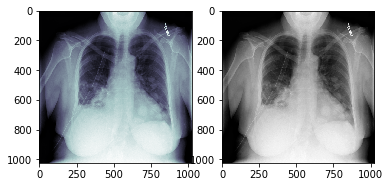

In [106]:
fig,ax = plt.subplots(1,2)
rect = patches.Rectangle((x,y),width,height,linewidth=1,edgecolor='r',facecolor='none')
ax[0].add_patch(rect)
ax[0].imshow(ds.pixel_array, cmap=plt.cm.bone)  #cmap=plt.gray 
rect = patches.Rectangle((x,y),width,height,linewidth=1,edgecolor='r',facecolor='none')